In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import matplotlib.style as style
pd.options.display.max_columns = 999

# Reading in csv 

In [2]:
data = pd.read_csv('Baby2018_1.csv')     # uncomment this line to read csv when needed

C:\Users\Gottlieb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# BINNING

In [3]:
age_bin = [0,15,20,25,30,35,40,45,50,100]

In [4]:
mom_age_bin= pd.cut(data['mothers_age'], age_bin)

In [5]:
data['mom_age_bin'] = mom_age_bin

In [6]:
mom_age_bin.value_counts()

(25, 30]     114779
(30, 35]     102053
(20, 25]      80495
(35, 40]      45112
(15, 20]      28928
(40, 45]       7539
(0, 15]         659
(45, 50]        589
(50, 100]         0
Name: mothers_age, dtype: int64

In [7]:
# categories for Body Mass Index: Underweight <18.5; Normal 18.5-24.9; Overweight 25.0-29.9; Obesity I 30.0-34.9; 
    #Obesity II 35.0-39.9; Extreme Obesity III >39.9; Unknown or Not Stated.
bmi_bin = [0,18.5,25,30,35,40,100] 

In [8]:
mom_bmi_bin = pd.cut(data['mothers_bmi'], bmi_bin)

In [9]:
data['mom_bmi_bin'] = mom_bmi_bin

In [10]:
mom_bmi_bin.value_counts()

(18.5, 25.0]     158220
(25.0, 30.0]      98614
(30.0, 35.0]      54463
(40.0, 100.0]     28667
(35.0, 40.0]      27321
(0.0, 18.5]       12869
Name: mothers_bmi, dtype: int64

In [11]:
wt_bin = [0,2500,4000,100000]

In [12]:
avg_wt_bin= pd.cut(data['birth_weight_gm'], wt_bin)

In [13]:
data['avg_wt_bin'] = avg_wt_bin

In [14]:
avg_wt_bin.value_counts()

(2500, 4000]      319269
(0, 2500]          31589
(4000, 100000]     29296
Name: birth_weight_gm, dtype: int64

In [15]:
# combined_gestation_wk

In [16]:
avg_gestation_bin = [0,20,28,32,37,42,60] 
#Under 20 weeks; 20-27 weeks; 28-31 weeks; 32-35 weeks; 36 weeks; 37-39 weeks; 40 weeks; 41 weeks; 42 weeks or more; Unknown.

In [17]:
avg_gestation_bin = pd.cut(data['combined_gestation_wk'], avg_gestation_bin)

In [18]:
data['avg_gestation_bin'] = avg_gestation_bin

In [19]:
avg_gestation_bin.value_counts()

(37, 42]    289164
(32, 37]     71720
(42, 60]      9739
(28, 32]      5924
(20, 28]      3101
(0, 20]        230
Name: combined_gestation_wk, dtype: int64

# New Dataframe with NICU Yes & No

In [20]:
dataClean = data[data.admit_NICU.isin(['Y','N'])]
# Here, we are making a new dataframe called "dataClean" where it is based on yes/no for admit_NICU

In [21]:
dataClean['admit_NICU'] = dataClean.admit_NICU.map({'Y': 1, 'N': 0}) # assignment of 1 and 0 for yes or no

C:\Users\Gottlieb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
dataClean.admit_NICU.value_counts() 

0    345311
1     34523
Name: admit_NICU, dtype: int64

# Analyze New Dataframe

In [23]:
dataClean = dataClean[sorted(data.columns)]

In [24]:
dataClean

,APGAR_score_10min,APGAR_score_5min,admit_NICU,admit_to_IC,anencephaly,anesthesia,antibiotics,antibiotics_for_newborn,assist_vent_after6,assist_vent_immed,asst_repro_tech,attendant_at_birth,aug_labor,avg_gestation_bin,avg_wt_bin,birth_day_of_wk,birth_month,birth_place,birth_time,birth_weight_gm,birth_year,chlamydia,chorioamnionitis,cigs_tri1,cigs_tri2,cigs_tri3,cleft_lip_or_palate,cleft_palate_only,combined_gestation_imputed,combined_gestation_wk,cong_diaph_hernia,cyn_cong_heart_disease,delivery_lbs,delivery_payment_source,down_syndr,fail_ext_cep,fathers_age,fathers_education,fathers_hispanic_origin,fathers_hispanic_origin2,fathers_race,fertil_enhance,fetal_present_at_birth,final_delivery_method,gastroschisis,gest_diab,gest_hypten,gonorrhea,hepB,hepC,hypospadias,hypten_ecl,induced_labor,infant_breastfed_at_discharge,infant_living_at_report,infant_transferred,infertility_treatment,last_norm_menses_mo,last_norm_menses_yr,limb_reduc_defect,maternal_transfusion,meningo_spina_bif,mo_prenatal_care_began,mo_since_last_live_birth,mo_since_last_other_birth,mom_age_bin,mom_bmi_bin,mother_transferred,mothers_age,mothers_age_imputed,mothers_bmi,mothers_education,mothers_height,mothers_hispanic_origin,mothers_hispanic_origin2,mothers_maristat_imputed,mothers_marital_status,mothers_nativity,mothers_race,mothers_race_imputed,mothers_residence_status,n_prenatal_visits,n_prev_cesar,no_cong_anamolies_checked,no_infection_reported,no_risk_reported,obst_est_edit_wk,obst_est_of_gestation_used,omphalocele,paternity_acknow,perineal_laceration,pluarlity_imputed,plurality,pre_preg_diab,pre_preg_hypten,pre_preg_lbs,prev_preterm_birth,prior_dead_births,prior_living_births,prior_terminations,rupt_uterus,seizures,sex_of_infant,sex_of_infant_imputed,steriods,success_ext_cep,surfactant,suspect_chromo_disorder,syphilis,trial_of_labor_attempt,unplanned_hyster,wic
0,88,9,0,N,N,Y,Y,N,N,N,X,1,N,"(37, 42]","(2500, 4000]",2,1,1,1227,3657,2018,N,N,0,0,0,N,N,,38,N,N,231,2,N,N,31,3,1,7,1,X,1,1,N,N,N,N,N,N,N,N,N,Y,Y,N,N,4,2017,N,N,N,3,16,33,"(25, 30]","(30.0, 35.0]",N,30,,30.7,6,66,0,1,,1,1,1,,2,8,0,1,1,1,40,,N,X,N,,1,N,N,190,N,0,1,2,N,N,M,,N,N,N,N,N,X,N,NaN
1,88,8,0,N,N,Y,N,N,N,N,X,1,N,"(37, 42]","(4000, 100000]",7,1,1,155,4130,2018,N,N,0,0,0,N,N,,39,N,N,201,1,N,N,26,4,0,1,1,X,1,1,N,N,N,N,N,N,N,N,N,Y,Y,N,N,4,2017,N,N,N,2,24,51,"(20, 25]","(25.0, 30.0]",N,25,,25.7,4,63,0,1,,1,1,1,,2,9,0,1,1,1,39,,N,X,N,,1,N,N,145,N,0,2,1,N,N,M,,N,N,N,N,N,X,N,NaN
2,88,9,0,N,N,Y,Y,N,N,N,X,1,N,"(37, 42]","(2500, 4000]",1,1,1,114,3900,2018,N,N,0,0,0,N,N,,41,N,N,186,2,N,N,37,4,0,1,1,X,1,1,N,N,N,N,N,N,N,N,N,Y,Y,N,N,3,2017,N,N,N,3,68,888,"(30, 35]","(25.0, 30.0]",N,35,,25.5,6,65,0,1,,1,1,1,,1,12,0,1,1,1,41,,N,X,N,,1,N,N,153,N,0,2,0,N,N,F,,N,N,N,N,N,X,N,NaN
3,88,9,0,N,N,N,N,N,N,N,X,1,N,"(32, 37]","(2500, 4000]",5,1,1,610,3590,2018,N,N,0,0,0,N,N,,37,N,N,158,5,N,N,22,4,0,1,1,X,1,1,N,N,N,N,N,N,N,N,N,Y,Y,N,N,4,2017,N,N,N,3,22,888,"(20, 25]","(18.5, 25.0]",N,22,,23.0,3,63,0,1,,1,1,1,,1,11,0,1,1,1,39,,N,X,N,,1,N,N,130,N,0,1,0,N,N,M,,N,N,N,N,N,X,N,NaN
4,88,9,0,N,N,Y,N,N,N,N,X,1,Y,"(37, 42]","(2500, 4000]",5,1,1,1905,3409,2018,N,N,0,0,0,N,N,,41,N,N,209,1,N,N,35,4,9,8,4,X,1,1,N,Y,N,N,N,N,N,N,N,Y,Y,N,N,3,2017,N,N,N,1,40,22,"(25, 30]","(30.0, 35.0]",N,30,,33.7,3,63,0,3,,1,1,3,,1,12,0,1,1,0,40,,N,X,N,,1,N,N,190,N,0,3,1,N,N,M,,N,N,N,N,N,X,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380149,88,9,0,N,N,Y,N,N,N,N,X,1,N,"(37, 42]","(2500, 4000]",6,12,1,18,3175,2018,N,N,0,0,0,N,N,,41,N,N,140,1,N,N,30,3,0,4,4,X,1,1,N,N,N,N,N,N,N,N,N,Y,Y,N,N,3,2018,N,N,N,3,18,888,"(30, 35]","(18.5, 25.0]",N,31,,20.8,3,61,0,

In [25]:
dataClean.columns.tolist()

['APGAR_score_10min',
 'APGAR_score_5min',
 'admit_NICU',
 'admit_to_IC',
 'anencephaly',
 'anesthesia',
 'antibiotics',
 'antibiotics_for_newborn',
 'assist_vent_after6',
 'assist_vent_immed',
 'asst_repro_tech',
 'attendant_at_birth',
 'aug_labor',
 'avg_gestation_bin',
 'avg_wt_bin',
 'birth_day_of_wk',
 'birth_month',
 'birth_place',
 'birth_time',
 'birth_weight_gm',
 'birth_year',
 'chlamydia',
 'chorioamnionitis',
 'cigs_tri1',
 'cigs_tri2',
 'cigs_tri3',
 'cleft_lip_or_palate',
 'cleft_palate_only',
 'combined_gestation_imputed',
 'combined_gestation_wk',
 'cong_diaph_hernia',
 'cyn_cong_heart_disease',
 'delivery_lbs',
 'delivery_payment_source',
 'down_syndr',
 'fail_ext_cep',
 'fathers_age',
 'fathers_education',
 'fathers_hispanic_origin',
 'fathers_hispanic_origin2',
 'fathers_race',
 'fertil_enhance',
 'fetal_present_at_birth',
 'final_delivery_method',
 'gastroschisis',
 'gest_diab',
 'gest_hypten',
 'gonorrhea',
 'hepB',
 'hepC',
 'hypospadias',
 'hypten_ecl',
 'induced

In [26]:
dataClean.columns[dataClean.columns.str.contains('mother')] 

# this was used to check columns that contain 'mother', use as needed to check for other str's

Index(['mother_transferred', 'mothers_age', 'mothers_age_imputed',
       'mothers_bmi', 'mothers_education', 'mothers_height',
       'mothers_hispanic_origin', 'mothers_hispanic_origin2',
       'mothers_maristat_imputed', 'mothers_marital_status',
       'mothers_nativity', 'mothers_race', 'mothers_race_imputed',
       'mothers_residence_status'],
      dtype='object')

# Comparison of admission into the NICU based on mother's age

In [27]:
# first:    use a groupby on the defined bin/aggregate the mean of the column (admit_NICU)
# second:   use pd.cut on the bin to get the actual bin according to how you define them, save to new variable
# third:    add the new variable as new column into the df 
# fourth:   plot

In [28]:
avg_age_bin = dataClean.groupby(['mom_age_bin']).agg({'admit_NICU':np.mean})

In [29]:
avg_age_bin

,admit_NICU
mom_age_bin,
"(0, 15]",0.100304
"(15, 20]",0.092001
"(20, 25]",0.086567
"(25, 30]",0.086910
"(30, 35]",0.088379
"(35, 40]",0.104993
"(40, 45]",0.132369
"(45, 50]",0.215986
"(50, 100]",NaN


Text(0.5, 0, 'Age Range')

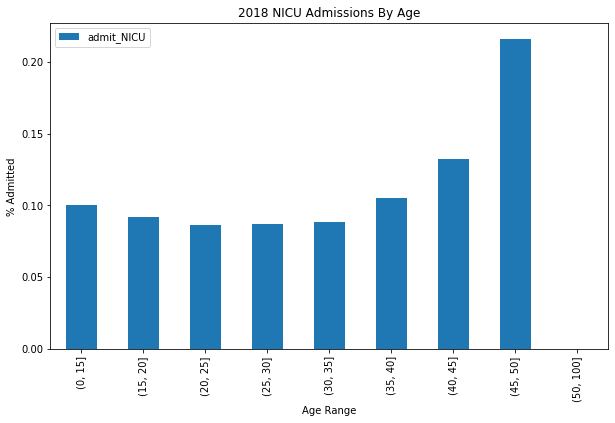

In [30]:
avg_age_bin.sort_index().plot(kind='bar',figsize=(10,6))
plt.title('2018 NICU Admissions By Age')
plt.ylabel('% Admitted')
plt.xlabel('Age Range')

# Comparison of admission into the NICU based on mother's BMI

In [31]:
avg_bmi_bin = dataClean.groupby(['mom_bmi_bin']).agg({'admit_NICU':np.mean})


In [32]:
avg_bmi_bin

,admit_NICU
mom_bmi_bin,
"(0.0, 18.5]",0.088583
"(18.5, 25.0]",0.079815
"(25.0, 30.0]",0.087596
"(30.0, 35.0]",0.096261
"(35.0, 40.0]",0.112861
"(40.0, 100.0]",0.133329


Text(0.5, 0, 'BMI Range')

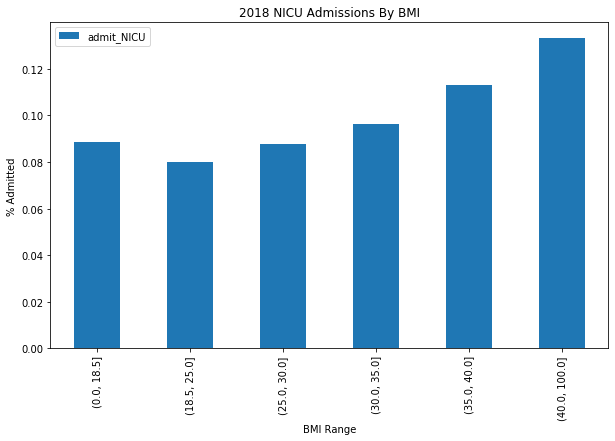

In [33]:
avg_bmi_bin.sort_index().plot(kind='bar',figsize=(10,6))
plt.title('2018 NICU Admissions By BMI')
plt.ylabel('% Admitted')
plt.xlabel('BMI Range')

In [34]:
avg_age_bin.sort_index().head()


,admit_NICU
mom_age_bin,
"(0, 15]",0.100304
"(15, 20]",0.092001
"(20, 25]",0.086567
"(25, 30]",0.086910
"(30, 35]",0.088379


In [35]:
dataClean.groupby('admit_NICU').mean().T

admit_NICU,0,1
APGAR_score_10min,87.579402,82.389653
APGAR_score_5min,9.166803,8.799902
attendant_at_birth,1.344185,1.201025
birth_day_of_wk,4.055260,4.084118
birth_month,6.561560,6.558381
birth_place,1.036553,1.021000
birth_time,1228.160623,1237.202387
birth_weight_gm,3332.713444,2623.117921
birth_year,2018.000000,2018.000000
cigs_tri1,1.071970,1.801639


# Comparison of admission into the NICU based on Gestation (in weeks)

In [36]:
avg_birth_wt=dataClean.groupby(['avg_wt_bin']).agg({'admit_NICU':np.mean})

In [37]:
avg_birth_wt

,admit_NICU
avg_wt_bin,
"(0, 2500]",0.500887
"(2500, 4000]",0.052384
"(4000, 100000]",0.068555


Text(0.5, 0, 'Grams')

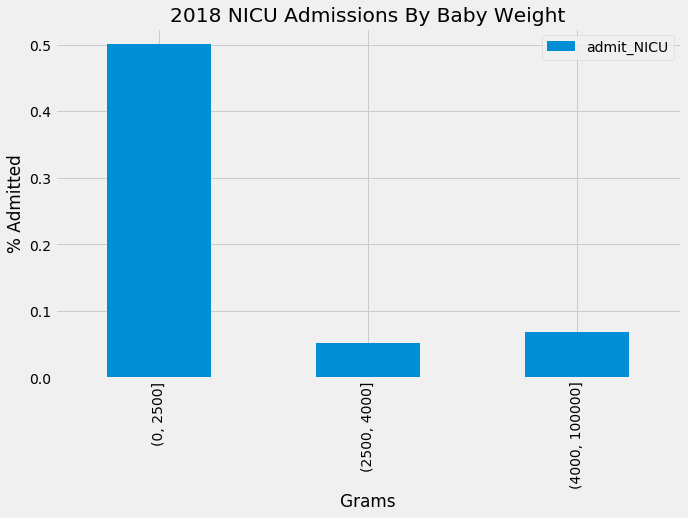

In [38]:
style.use('fivethirtyeight')
avg_birth_wt.sort_index().plot(kind='bar',figsize=(10,6))
plt.title('2018 NICU Admissions By Baby Weight')
plt.ylabel('% Admitted')
plt.xlabel('Grams')

# Comparison of admission into the NICU based on baby weight (in grams)

In [39]:
avg_gest_wt=dataClean.groupby(['avg_gestation_bin']).agg({'admit_NICU':np.mean})

In [40]:
avg_gest_wt

,admit_NICU
avg_gestation_bin,
"(0, 20]",0.127193
"(20, 28]",0.738188
"(28, 32]",0.673369
"(32, 37]",0.208533
"(37, 42]",0.044064
"(42, 60]",0.052421


# High Risk Categories

In [41]:
avg_gest_wt[avg_gest_wt>= 0.18 ]

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

,admit_NICU
avg_gestation_bin,
"(0, 20]",NaN
"(20, 28]",0.738188
"(28, 32]",0.673369
"(32, 37]",0.208533
"(37, 42]",NaN
"(42, 60]",NaN


Text(0.5, 0, 'Week Born')

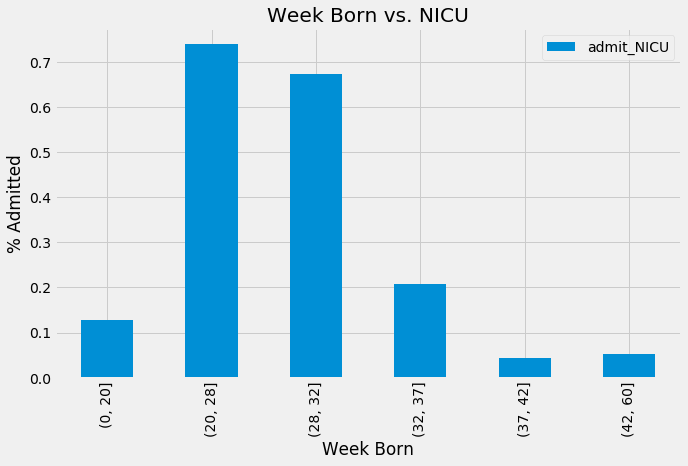

In [42]:
style.use('fivethirtyeight')
avg_gest_wt.sort_index().plot(kind='bar',figsize=(10,6))
plt.title('Week Born vs. NICU')
plt.ylabel('% Admitted')
plt.xlabel('Week Born')

# Comparison of admission into the NICU based on no congenital anomalies 

In [43]:
avg_anamolies=dataClean.groupby([dataClean.no_cong_anamolies_checked]).agg({'admit_NICU':np.mean})

In [44]:
avg_anamolies

,admit_NICU
no_cong_anamolies_checked,
0,0.532567
1,0.089038
9,0.439437


Text(0.5, 0, 'Has Anomoly=0, No Anomoly= 1, Unknown= 9')

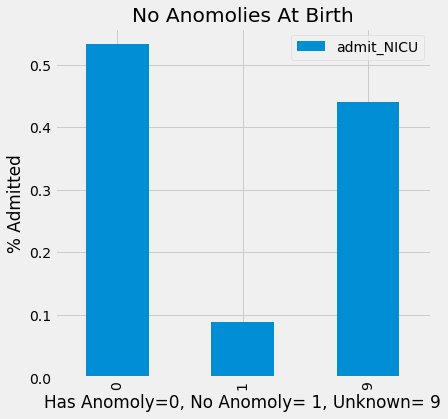

In [45]:
style.use('fivethirtyeight')
avg_anamolies.sort_index().plot(kind='bar',figsize=(6,6))
plt.title('No Anomolies At Birth')
plt.ylabel('% Admitted')
plt.xlabel('Has Anomoly=0, No Anomoly= 1, Unknown= 9')

# Comparison of admission into the NICU based on seasonality 

In [46]:
months = dataClean['birth_month']
months

0          1
1          1
2          1
3          1
4          1
          ..
380149    12
380150    12
380151    12
380152    12
380153    12
Name: birth_month, Length: 379834, dtype: int64

In [47]:
avg_months = dataClean.groupby(['birth_month']).agg({'admit_NICU':np.mean})

In [48]:
avg_months

,admit_NICU
birth_month,
1,0.091672
2,0.092689
3,0.089313
4,0.091004
5,0.090586
6,0.089702
7,0.094526
8,0.088812
9,0.086673


In [49]:
months.value_counts() # we see august is the most, feb is the least

8     34500
7     32975
10    32711
9     32386
5     32113
3     31720
6     31549
1     31471
12    31071
11    31011
4     29834
2     28493
Name: birth_month, dtype: int64

Text(0.5, 0, 'Months')

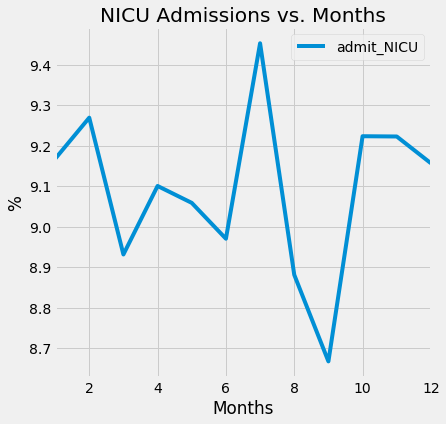

In [50]:
style.use('fivethirtyeight')
(100*avg_months.sort_index()).plot(figsize=(6,6))
plt.title('NICU Admissions vs. Months')
plt.ylabel('%')
plt.xlabel('Months')

In [51]:
# z-test performed

In [52]:
count = np.array([2641,3064]) # 2641 comes from multiplying '2' aka feb. up above

In [53]:
nobs = np.array([28493,34500])

In [54]:
stat, pval = proportions_ztest(count, nobs)

In [55]:
pval

0.09142437586154742